# Bonterra Take-Home Assessment 
----------------------------------------
Submission by: David Li  
Contact: davidjli@umich.edu / (248)918-8782

-------------------------------------------------------------------------------------

### Opening Thoughts on the Use Case / Task:

The task at hand is to analyze the Gift Dataset (linked in the Assessment instructions) and build a meaningful model. The Instructions give a few example problem statements, but we can focus on **predicting the future gift sizes for current donors**

As part of strategizing and brainstorming when approaching any new tasks, it would be thoroughly advised to review the business requirements, success criteria, and anticipated challenges - identified by either the stakeholder/Data Scientist. 
This will overall lead to a more organized strategy when handling the task and identifying any potential technical/data/project risks as far in advance as possible!

#### Business/Task Requirements:
- Likely Model Type / Use Case: Time Series Forecasting
- Column of Interest: gift (for gift size)
- Predict: Future Gift Amounts

#### Success Criteria:
- Provide Data Analysis to pinpoint data quality issues and statuses.
- Built a Predictive Model using the Gifts Dataset referenced.
- Due to time constraints, accuracy is not the highest priority - but still best to do sanity checks and quick reviews. Especially with Data the company/individual/stakeholders are not necessarily familar with.
- Write Organized Code with Helpful Documentation
- Document Helpful Ideas and Thoughts along the process.

#### Anticipated Challenges:
- This is data we are not fully familiar with the collection and engineering process. So we should especially be on lookout for missing or low-quality data.
- We will need to frame our outlook of this data in a Time Series fashion. It is clear the data is following a temporal nature.
- Each row would be a particular gifting instance, and can have repeats from other rows in terms of who the donor is, who the gifted to ID is, etc.

------------------------------------------------------------------

### Ingestion/Exploratory Data Analysis (EDA)

Though the Modeling is usually the more "exciting" part of the project, it's important to be well-informed on the data we are working with.  

The idea is to take a look at the variables individually (uni-variate) as well as check out a few correlation/relationships between variables (bi-variate) that we suspect may have interesting patterns. Additionally, there are other vital reasons why EDA is strongly needed for successful and clean modeling.

- Determining how to address missing/low-quality data upfront segments much of the Data Manipulation code away from the AI/ML Modelling Code, making corrections/revisions easy to add in the corresponding section (as vs. all of the code entangled together)  
- Addressing all Data Quality Issues upfront eliminates confusion between a Data process issue vs. a Modelling process issue, which is extremely relevant when we need to identify the root cause of poor model performance or make model enhancements/improvements. It saves significant time.
- It gives direction on how to initially approach the modelling steps. Learning what variables are poorly maintained, insignificant, or irrelevant can save significant time in deciding how to be constructing and setting up the model. It becomes easier to quickly start with a fairly reasonable model - especially great if deadlines or resources happen to be constrained. 

In consideration with the time constraints for the assignment and brevity for the notebook, we'll only look at a few select examples to review and visualize - as normally EDA can be as extensive as up to all variables and correlations if such degree was needed.

In [49]:
# Import Python Packages Necessary for Assignment
import numpy as np # Data Manipulation
import pandas as pd  # Data Manipulation
import matplotlib.pyplot as plt # Generating Graphs, especially for EDA
import seaborn as sns # Generating Graphs, especially for EDA

In [50]:
# Import Dataset
gifts_df = pd.read_excel("FakeGIftHist.xlsx") # Assumes dataset is in same folder as this .ipynb

In [51]:
# Preview the Data
gifts_df.head()

,OrgID,DonorID,gift,giftdate
0,10830124,17770149,50.0,2015-01-10
1,10830124,17002148,100.0,2016-08-08
2,10830124,17002148,100.0,2014-08-06
3,10830124,17002148,100.0,2013-08-10
4,10830124,17002148,550.0,2014-10-19


In [52]:
# Review the columns we have access to in the Dataset
gifts_df.columns

Index(['OrgID', 'DonorID', 'gift', 'giftdate'], dtype='object')

At this stage, it's important at a High-Level Glance to:  

Understand what information is being conveyed in the data. There looks to be 3 main types of information conveyed. 
- Identification Information: OrgID, DonorID. Mostly used as referencing or labeling
- Time Series Temporal Reference: giftdate. Helps to understand the Times Series nature
- Numerical Amount/Metric: gift. Quantified as probably the amount in size of the gift

Note what columns we have questions about their meaning or the scale/representation used.
- We would want to consider if some OrgIDs are DonorIDs themselves, and vice-versa
- We would normally also like to ask what the intended period of this data is. That way if some IDs are not having certain data, we can investigate if its an intended omittance, or a data issue.

Questions from this portion would entail collaborative/discovery meetings with Data SMEs, other Data Team Members (Scientists, Engineers), and stakeholders to confirm the team + stakeholders are seeing the data on the same page.



In [53]:
# Next, we would want to clean up the data to give both a better understanding and set up our modelling for success (i.e. "Garbage in Garbage Out")

# Count total NaN at each column in a DataFrame 
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
    gifts_df.isnull().sum()) 

# Print Total Number of Rows for Relative Reference
print(" \nCount total rows in Dataframe : \n\n", 
    gifts_df.shape[0])

 
Count total NaN at each column in a DataFrame : 

 OrgID       0
DonorID     0
gift        0
giftdate    0
dtype: int64
 
Count total rows in Dataframe : 

 47131


Even a simple exercise of counting the number of missing values will give some insight on data quality. 

- Here, we can see that there are no missing values in each column. This is a nice outcome, but does not automatically imply that the quality/accuracy of the data would be correct.  
- Additionally, it does not imply that there could not be outliers, which should be a consideration for most models.

In [54]:
# Prepare an EDA Dataset containing informative rows and relevant predictive column attributes as discussed so far.
# We can work/modify our existing dataset to avoid creating more and more copies of the dataset, to preserve memory utilization

# Note: A particular step I personally find very useful and worthwhile to do is coercing all the types very early ahead of time if the dataset size is reasonable for that exercise. 
# It facilitates all future code as we know exactly what data types we are working with, and makes it easy to check for data type correctness for all future EDA and Modelling requirements.
# Takes some extra time in the beginning, but saves tons of time and headache later!

# Specify Data Types for what values we would expect
STR_COLS = ['OrgID', 
       'DonorID']
FLOAT_COLS = ['gift']
DATE_COLS = ['giftdate']

# Coerce Data Types for what values we would expect. Note: Errors in Coercion become NA from the parameter specified.
gifts_df[STR_COLS] = gifts_df[STR_COLS].astype(str) # String
gifts_df[FLOAT_COLS] = gifts_df[FLOAT_COLS].apply(pd.to_numeric, errors = 'coerce') # FLoats/Decimals
gifts_df[DATE_COLS] = gifts_df[DATE_COLS].apply(pd.to_datetime, errors = "coerce") # DateTime

In [55]:
# Preview how the data looks so far
gifts_df.head()

,OrgID,DonorID,gift,giftdate
0,10830124,17770149,50.0,2015-01-10
1,10830124,17002148,100.0,2016-08-08
2,10830124,17002148,100.0,2014-08-06
3,10830124,17002148,100.0,2013-08-10
4,10830124,17002148,550.0,2014-10-19


Now the Data is ready to be explored! Keep in mind the 3 broad ideas we mentioned earlier.

- Data Scope (i.e. When, Where)
- Individual Variable Breakdowns
- Multi-Variable Correlations/Trends

In [56]:
# Analyze Dataset Size 
gifts_df.shape

(47131, 4)

In [57]:
# Understand Timeframe of the Data 

# Earliest giftdate
print(gifts_df["giftdate"].min())

# Latest giftdate
print(gifts_df["giftdate"].max())

1986-01-02 00:00:00
2030-06-24 00:00:00


Based on the information above, we've learned that:

- We have just under 50,000 total rows. But depending on the number of OrgID values, the number of gifts within each OrgID grouping could vary. This is something we should check out in the EDA.
- The gift dates range as early as 1986, and have values in the future (i.e. 2030). 

The biggest takeaway here is that having an early date here can make sense. But having a future date is something to determine whether it is a intended / pre-set transaction (i.e. automatic payment style), or it being a data entry error.

## Univariate EDA

In [58]:
# Review OrgID
gifts_df["OrgID"].value_counts()

OrgID
10109128    43524
17863152     1640
18517140      703
10830124      300
11322158      174
16646159      171
10734153      156
16183152      139
15815138      116
13687150       77
15259160       74
11413152       57
Name: count, dtype: int64

In [59]:
# Review DonorID
gifts_df["DonorID"].value_counts()

DonorID
19406147    1596
19331147    1591
19346147    1586
19512147    1537
19615147    1533
            ... 
17853153       1
17852153       1
17846153       1
17924153       1
19518148       1
Name: count, Length: 2096, dtype: int64

In [60]:
# Review gift
gifts_df["gift"].value_counts()

gift
35.00      9448
25.00      6941
50.00      6675
100.00     4017
10.00      3695
           ... 
94.91         1
93.32         1
101.45        1
116.45        1
2256.00       1
Name: count, Length: 466, dtype: int64

In [61]:
# Review gift
gifts_df["gift"].describe()

count     47131.000000
mean        188.810787
std        4280.473187
min           1.000000
25%          25.000000
50%          35.000000
75%          50.000000
max      350000.000000
Name: gift, dtype: float64

In [62]:
# Review giftdate
gifts_df["giftdate"].value_counts()

giftdate
2020-04-07    18207
2019-01-18       61
2014-12-31       46
2006-06-06       38
2017-01-04       37
              ...  
2003-07-31        1
2000-12-18        1
1999-09-01        1
1998-08-12        1
2017-06-02        1
Name: count, Length: 7159, dtype: int64

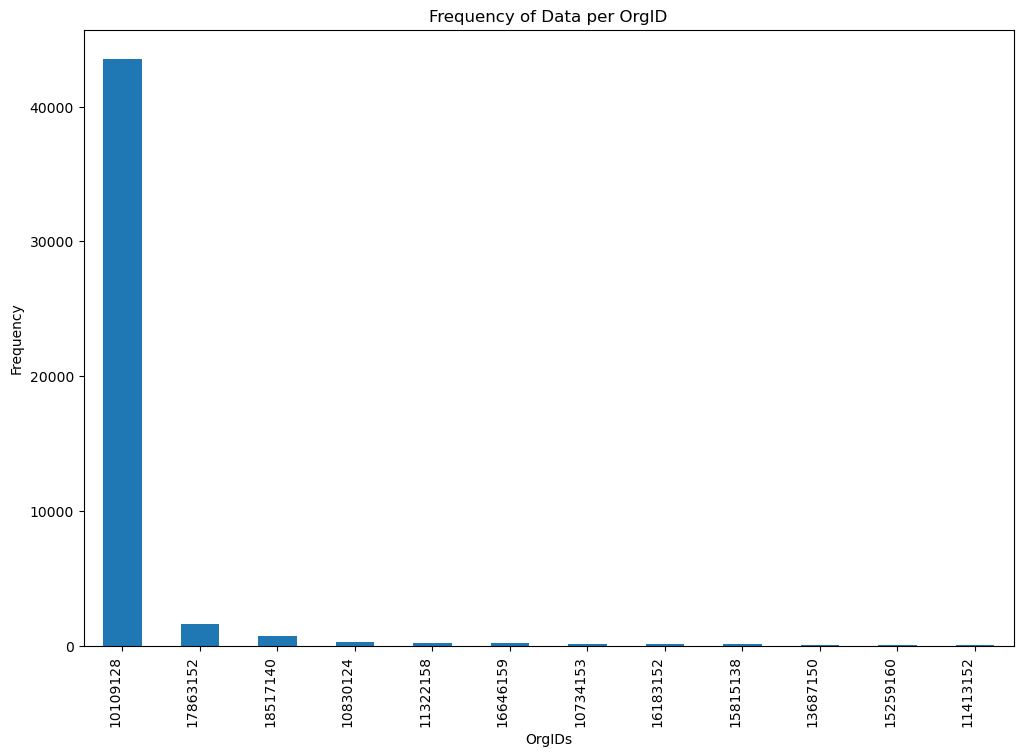

In [63]:
# Graph OrgID
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the Frequencies, Sorted by descending frequencies
gifts_df["OrgID"].value_counts().plot(ax=ax, kind='bar')
# Set Graph Elements (Title, Axis Labels)
ax.set(title= "Frequency of Data per OrgID",  #Set a title and x-and y-axis labels
        ylabel= "Frequency", 
        xlabel= "OrgIDs")
# Rotate Axises
plt.xticks(rotation=90, ha='right')
plt.show()

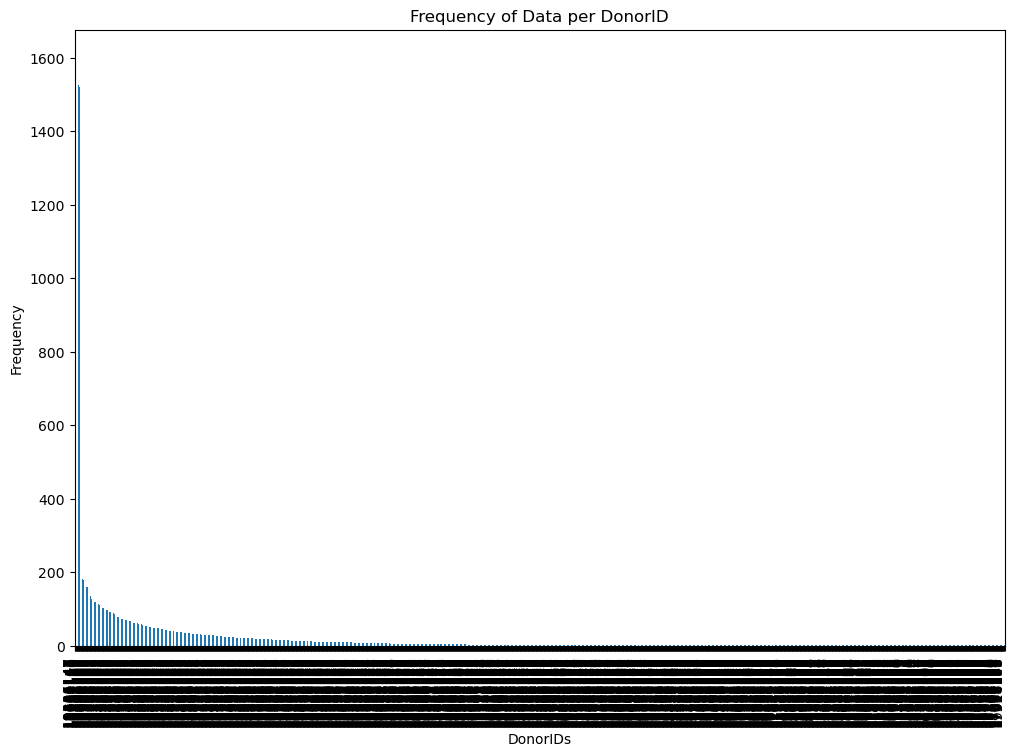

In [64]:
# Graph DonorID
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the Frequencies, Sorted by descending frequencies
gifts_df["DonorID"].value_counts().plot(ax=ax, kind='bar')
# Set Graph Elements (Title, Axis Labels)
ax.set(title= "Frequency of Data per DonorID",  #Set a title and x-and y-axis labels
        ylabel= "Frequency", 
        xlabel= "DonorIDs")
# Rotate Axises
plt.xticks(rotation=90, ha='right')
plt.show()

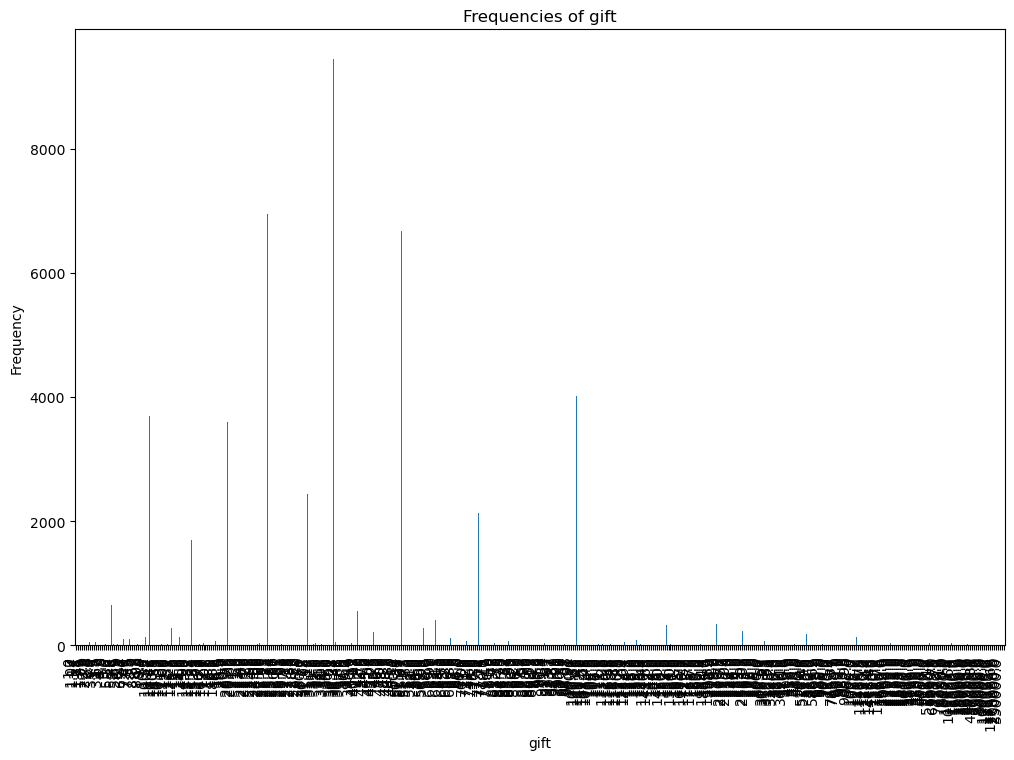

In [65]:
# Graph gift
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the Frequencies, Sorted by gift
gifts_df["gift"].value_counts(sort = False).sort_index().plot(ax=ax, kind='bar')
# Set Graph Elements (Title, Axis Labels)
ax.set(title= "Frequencies of gift",  #Set a title and x-and y-axis labels
        ylabel= "Frequency", 
        xlabel= "gift")
# Rotate Axises
plt.xticks(rotation=90, ha='right')
plt.show()

For this Single Variable Analysis, Graphs were generated. But due to the size of the data and time required to make the graphs legible, they are not visually amazing and need to be used in combination with frequency counts through value_counts(). The combination of these two can provide the necessary insight we were looking for.

We learn about a few key features and facts this way:

- The majority of OrgIDs all come from one Org, 10109128 at ~40000 rows. The next most frequent org is 17863152, at only ~1500 rows. So the data is heavily representative of a lot of data for this frequent Org.

- The DonorID frequency graph shows multiple ~12 DonorIDs all with high frequencies. Beyond these 12, the frequencies are spotted and varies across many DonorIDs

- The gift column shows high frequencies of specific amounts, namely the usual threshold generic donation amounts (i.e. 10, 20, 50, 100, 25, etc.) Since these values have much more frequency than the many other values, they are probably pre-select / default options but also allowing for custom amounts.

- The statistical summary of the gift column shows the majority of results (i.e most percentile thresholds) in the 1-100 range, indicating the majority of the spread of the results are reasonably located here. However, the mean and standard deviation are exceptionally high, likely influenced by the maximum value of 350,000. This would bring a question if these values should be omitted (as values like 350,000 would occur so infrequently and are not usually expected), to prevent the model from trying to overcompensate for this "outlier". 

- With giftdate, we prior mentioned the large range of a very early and a future date as the minimum and maximum date ranges of the data. Additionally, generating frequencies for the dates shows that there is one date that has an astounding high frequency seen, 2020-04-07 at ~18000 times. Again, this is exceptionally high given the frequency of many other dates is at most 60 times. It would probably be interesting to investigate the root cause of the data being like this.


Nice-To-Haves:  
With further time, it would be great to spend more time polishing and making nice visuals that could be used as visual aids / references in powerpoints or presentations for stakeholders. 

Potential Issues:  
We've seen some imbalance in the frequency of particular groupings/IDs. There are some "outliers" that we should be cautious of, but find difficult to adequately handle without deeper research and/or investigating the cause of. 

## Bivariate EDA

In [66]:
# Analyze number of OrgID and DonorID pairings
gifts_df[["OrgID", "DonorID"]].value_counts()

OrgID     DonorID 
10109128  19406147    1596
          19331147    1591
          19346147    1586
          19512147    1537
          19615147    1533
                      ... 
          18194154       1
10830124  17428156       1
          17432156       1
10109128  18159153       1
11413152  18720150       1
Name: count, Length: 2100, dtype: int64

Normally with multiple attributes, bivariate EDA would be great to analyze correlations and relationships. Since there is just one numeric amount that is of importance + our time constraint of this assignment, we will be brief on the Bivariate EDA for now.

Some future considerations:

- Analyze gift vs giftdate breakdowns
- Analyze OrgID vs gift amounts

### EDA Concluding Thoughts/Remarks

With a mix of data curiosity, healthy skepticism, and careful attention to data details - we've gotten very strong ideas about how the layout and trends of the gifts dataset fare out. Not only do we have a strong conceptual understanding, but we've taken careful attention to prepare our Dataset to follow into the next Modelling section. We took steps to clearly designate how the data attributes should exist and function  (i.e. coercing the data types), and have sectioned out missing data and/or low quality data. 

As mentioned in the EDA remarks in the above sections, there would be many areas of further investigation that would absolutely be beneficial. Aside from these, we could also look to expand upon the data by considering external sources. We touch more on this in the final conclusion.

--------------------------------------------------------------------------------------------

### Initial / v1 Classification Modelling

As discussed up through now from the Opening Remarks section and EDA section, we are set on the type of Model we want to build for our use case: a Time Series model for predicting gift amounts.

Recall a few key insights/points we've gathered that should be accounted for in our modelling:

- There are various OrgIDs, with a heavy frequency on one particular OrgID so there is some imbalance here.

- The distribution of OrgIDs to their donated to DonorID is not equal in frequency (i.e there are some pairings where there are only one such donation logged)

- There is one particular giftdate that has a high frequency seen. 

- Gift Amounts are for the most part in standard amounts and mostly spread in lower ranges 1-100. But there are a few large amounts like 350,000 that may throw off the model.

------------------------------------------------------------------

Our Key Steps in the (first-pass) Modelling Phase will be to:

- Perform any Data Transformations in the Dataset if necessary. This could either to synthesize/derive additional variables to help the model learn, or to re-design a few attributes so that they are better understood by the model. For example, having Start & End dates as isolated variables will not be valuable to the Model Learning - we need to transform this into an idea such as "Time between Start and End Dates" for the Model to use.

- Implement a ML model, or ideally another or two. Having accessible output and performance from two models becomes additionally helpful to discern similar patterns/advantages/interpretations gained from the Modelling process, versus relying solely upon the output of a single model implemented. For assignment brevity, we will just stick to one simple model.

- Be cognizant and aware of the performance of the model, by reviewing the performance metrics. Additionally, consider the non-technical advantages/dis-advantages of the model - interpretation, usability, monitoring, complexity of the results. As a whole, an adoption of the model in the industry greatly relies on the best of both technical and non-technical upsides.

--------------------------------------------------------------------

An additional step for this assignment - we will just build a model for one particular OrgID - the OrgID we have a medium sized data on (too large and the training will take too long, too small and the model may not have enough data). Normally to incorporate the whole dataset, we may have a predictive model for each individual OrgID as they each have their own distinct donation patterns. In that case, we would need to pay more attention to the differences between the OrgIDs such as grouping sizes, etc.

For simplicity in this assignment, we will subset our data to this one OrgID and build a model here. As a potential extension exercise, this could be generalized to all of the OrgIDs.

In [67]:
# Recall the Dataset we landed on from EDA
gifts_df.head()

,OrgID,DonorID,gift,giftdate
0,10830124,17770149,50.0,2015-01-10
1,10830124,17002148,100.0,2016-08-08
2,10830124,17002148,100.0,2014-08-06
3,10830124,17002148,100.0,2013-08-10
4,10830124,17002148,550.0,2014-10-19


In [68]:
# Subset the dataset to just use our 2nd most common OrgID, 17863152
gifts_df = gifts_df[gifts_df["OrgID"] == "17863152"]

In [69]:
gifts_df

,OrgID,DonorID,gift,giftdate
45417,17863152,10395156,15.53,2017-06-30
45418,17863152,10342156,25.00,2012-05-04
45419,17863152,10342156,25.00,2012-05-18
45420,17863152,10342156,25.00,2012-06-10
45421,17863152,10342156,30.00,2011-12-29
...,...,...,...,...
47052,17863152,17149159,19.00,2020-12-06
47053,17863152,17475158,4.00,2020-11-21
47054,17863152,18187150,26.01,2020-12-31
47055,17863152,17623159,25.00,2020-12-15


Our Preliminary Model of Choice will be ARIMA, which stands for AutoRegressive Integrated Moving Averages - particularly chosen for the context of this assignment.

Pros:
- It is a fairly decent "first-shot" model for Time Series, usually with good performance.
- It does not require many different attributes like a typical regression model or more sophisticated time series models.
- It captures typical time series patterns well, such as seasonality and exogenous variables.

Cons:
- The interpretability of a ARIMA model is difficult, and not directly translatable compared to a model like regression or tree-based modelling.
- The parameters are not intuitively estimatable, and requires some form of grid-search and domain knowledge to tune appropriately.
- It requires many time points to get a good sense of the pattern.
- It can be computationally expensive or slow depending on the data.

No model will be perfect for a given scenario especially in fast experimentation. But the pros for ARIMA make strong enough sense as our choice for this assignment.

As many other models, ARIMA similarly comes with its own assumptions and requirements in the data to be evaluated. This is normally a significant important step - if the model assumptions are not validated, then the model output and insights are irrelevant/inaccurate in solving our problem statement.
To save time in this assignment, we will rather just cover the Assumptions and normally what we would do to validate and verify these assumptions. These can be looked up, and the bottom excerpt is taken from GPT and pasted as reference.

"
Stationarity:  
Assumption: ARIMA models assume that the time series data is stationary. Stationarity means that the statistical properties (such as mean, variance, and autocorrelation) remain constant over time.
Validation:  
Check the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots of the residuals. If they decay quickly (indicating no significant correlation), it suggests stationarity.
Perform the Augmented Dickey-Fuller (ADF) test to formally test for stationarity. A low p-value indicates stationarity

Independence of Residuals:  
Assumption: The residuals (errors) should be independent and not exhibit any patterns.  
Validation:  
Use the Ljung-Box chi-square statistics to test for independence of residuals. A non-significant p-value suggests independence2.
Inspect residual plots for any patterns (e.g., trend, seasonality, or cyclic behavior).

Normality of Residuals:  
Assumption: The residuals should follow a normal distribution.  
Validation:  
Examine the histogram or Q-Q plot of the residuals. If they closely resemble a normal distribution, the assumption holds.

Constant Variance (Homoscedasticity):  
Assumption: The variance of residuals should remain constant across all time points.  
Validation:  
Plot the residuals against the predicted values. If the spread remains consistent, homoscedasticity is met.

No Autocorrelation in Residuals:  
Assumption: Residuals should not exhibit significant autocorrelation.  
Validation:  
Check the ACF and PACF plots of the residuals. If they show no significant spikes, the assumption is satisfied.

Correct Model Order Selection:  
Assumption: Choosing the correct order (p, d, q) is crucial for ARIMA models.  
Validation:  
Use out-of-time cross-validation (e.g., train-test split) to evaluate different model orders and select the one with the best performance3.
Monitor accuracy metrics (e.g., Mean Squared Error, Root Mean Squared Error) on the validation set.

In [70]:
# Remove our ID variable in the dataset
gifts_df.drop(columns = ["OrgID", "DonorID"], inplace = True)

# Rearrange the columns
gifts_df = gifts_df[["giftdate", "gift"]]

# Sort by giftdate ascending
gifts_df.sort_values("giftdate", inplace = True)

In [71]:
# Normally there are data-based / statistical processes to determine the ideal parameters for the ARIMA model.
# Instead to save time, we can do a grid search to find these parameters and choose a parameter set that minimizes our regression error.
# As an additional time saver step, we reference public-ly available ARIMA code for this section: 
# CREDITS TO https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

# This Cell Takes a long time to run, we comment it out and discuss the final parameter set below


from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set Index for our dataset:
gifts_df.set_index('giftdate', inplace = True)

'''
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    print(str(p) + " " + str(d) + " " + str(q))
                    print("")
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))



# evaluate various parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(gifts_df.values, p_values, d_values, q_values)
'''
# Best Parameter set was ARIMA(p = 0, d = 1, q = 1) RMSE=661.789


'\n# evaluate an ARIMA model for a given order (p,d,q)\ndef evaluate_arima_model(X, arima_order):\n    # prepare training dataset\n    train_size = int(len(X) * 0.66)\n    train, test = X[0:train_size], X[train_size:]\n    history = [x for x in train]\n    # make predictions\n    predictions = list()\n    for t in range(len(test)):\n        model = ARIMA(history, order=arima_order)\n        model_fit = model.fit()\n        yhat = model_fit.forecast()[0]\n        predictions.append(yhat)\n        history.append(test[t])\n    # calculate out of sample error\n    rmse = sqrt(mean_squared_error(test, predictions))\n    return rmse\n \n# evaluate combinations of p, d and q values for an ARIMA model\ndef evaluate_models(dataset, p_values, d_values, q_values):\n    best_score, best_cfg = float("inf"), None\n    for p in p_values:\n        for d in d_values:\n            for q in q_values:\n                order = (p,d,q)\n                try:\n                    print(str(p) + " " + str(d) +

predicted=135.348480, expected=31.140000
predicted=135.067733, expected=51.700000
predicted=134.339430, expected=30.000000
predicted=133.193171, expected=10.000000
predicted=132.387360, expected=100.000000
predicted=132.161341, expected=250.000000
predicted=133.209045, expected=25.000000
predicted=131.115640, expected=14.000000
predicted=131.267334, expected=500.000000
predicted=133.749377, expected=800.000000
predicted=139.207240, expected=103.080000
predicted=137.968092, expected=20.860000
predicted=137.684954, expected=42.000000
predicted=136.931197, expected=30.000000
predicted=136.120177, expected=10.000000
predicted=135.439703, expected=15.530000
predicted=133.717611, expected=41.420000
predicted=133.543380, expected=308.630000
predicted=135.125997, expected=31.140000
predicted=134.371021, expected=31.140000
predicted=132.712081, expected=15.720000
predicted=132.461905, expected=25.000000
predicted=131.749821, expected=10.590000
predicted=130.913540, expected=51.700000
predicted=

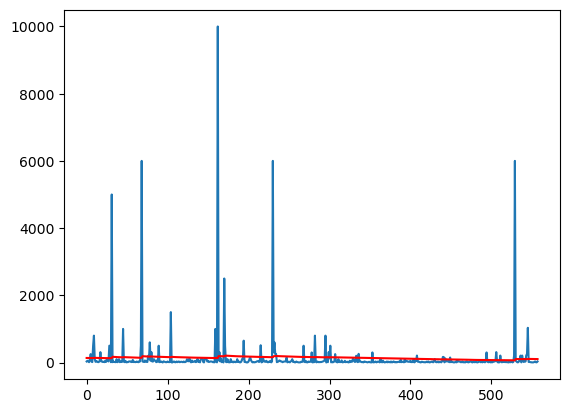

In [72]:
# Since we have the optimal parameter set now, lets build the model and forecast some future dates.
# Again, to save time on this assignment we reference public-ly existing code at:
# CREDITS TO https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

# split into train and test sets
X = gifts_df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


------------------------------------------------------------------------------

### Modeling Concluding Thoughts / Remarks

Our Modelling was complete and we were able to obtain predictions as well as metrics of the overall performance.

There are comments to be made in terms of the performance with our ARIMA model for the gifts dataset:

Firstly, we should properly define our metric that we are looking to optimize - consequently optimizing our model as well. 
RMSE is Root Mean Squared Error, which is a relatively common metric used to assess the overall distance (i.e. "accuracy") between our predicted data points and actual data points. Note this number may be much larger than our individual data points, as it is a summation of the errors of all of our data points.  The lower the number this is, the better performant the model is.

In order to determine an ideal set of parameters to use for our model, we can implement a simple grid search of the parameters. That is, we try a few different combinations of the required parameters for the model and choose the parameter set that yields the best model performance.

Our Model Parameter set of (0, 1, 1) showed an RMSE of 661.789, which can be a good baseline for future extensions and improvements to the model. We can briefly explain the parameter set below:

The p parameter indicates the AutoRegressive (AR) nature of the model, meaning the approximate relationship of a value with previous past values. We searched through values of [0, 1, 2, 4, 6, 8, 10].

The d parameter indicates the differencing required in the model to maintain stationarity, which is a vital component of how the ARIMA model detects the time series patterns. We searched through values of 0 through 3.

The q parameter indicates the Moving Average (MA) component of the model, meaning an expression of significant lagged forecast errors. We searched through values of 0 through 3.

Overall, our intention was to establish a baseline model as this sets the foundation for iterative model improvements and future modelling steps. Remember we have a clear idea of the areas of improvement in our current process, and the next steps we would take.

Areas of Improvement:

- As we can analyze from the visual graph predictions and individual predictions, the model isn't quite accurate enough to be impressive. Most of the predictions end up quite far from the actual values. This would clue us in that the extreme values maybe definitely do need to be removed as an extension step. Alternatively, there possibly need to be assisting attributes that may indicate or explain why there are certain higher donations at certain points.

- Our grid search is a simplified, "brute force" approach to determining the p,d,q hyperparameters needed for the ARIMA model. If computation is a limitation or a factor for the project, there are statistical processes and methods to assist in getting a narrower sense of what the hyperparameters should be or approximately be.

- We had only implemented the model for one medium-sized data of OrgID. Not having models for the other various OrgIDs could miss important gaps or anomalous patterns that need to be corrected for.

- There are many other Time Series models that may outperform our ARIMA model if we do more extensive exploratory analysis (i.e. if seasonality is a strong factor, the Seasonal ARIMA model may be a more obvious choice).  

- There may be more sensible groupings that are sufficient to apply here for multiple benefits (i.e. aggregating gift amounts in a way to reduce the data points and improve model speed and possibly performance).  

- We noticed there were some outlier gift amounts. We may want to resolve/justify these data points and decide if they should be handled/removed for better model performance.

Potential Next Steps:

- Do deeper data plotting / analysis to investigate and extract more data patterns that can further inform our modelling setup (i.e. if seasonality is a significant component)

- Explore/Try other Time Series Models, such as SARIMAX, LSTM, Prophet, etc.

- Retry the Modelling with different aggregations/groupings of the data. 

- Extend to other OrgIDs and extract learnings/insights to help us better model in future iterations.
